# Comparison

## Defining Data

In [ ]:
# Performance metrics data for different libraries/methods
stats = {
    "Pure Python": {
        "Execution Time (s)": 2.328932,
        "CPU Usage (%)": 98.5,
        "Memory Usage (MB)": 1524.066406,
        "Throughput (rows/sec)": 54228.288957
    },
    "Polars": {
        "Execution Time (s)": 2.317019,
        "CPU Usage (%)": 86.4,
        "Memory Usage (MB)": 1537.031250,
        "Throughput (rows/sec)": 54507.106233
    },
    "Modin": {
        "Execution Time (s)": 1.083179,
        "CPU Usage (%)": 16.8,
        "Memory Usage (MB)": 1531.855469,
        "Throughput (rows/sec)": 116595.687643
    },
    "Dask": {
        "Execution Time (s)": 1.219067,
        "CPU Usage (%)": 75.4,
        "Memory Usage (MB)": 1533.863281,
        "Throughput (rows/sec)": 103598.932118
    },
    "Swifter": {
        "Execution Time (s)": 1.483202,
        "CPU Usage (%)": 36.9,
        "Memory Usage (MB)": 1532.441406,
        "Throughput (rows/sec)": 85149.548984
    }
}

# You might also want to define labels and x-axis positions here as they are used in all plots
labels = list(stats.keys())
x = np.arange(len(labels)) # Positions for the bars on the x-axis
width = 0.6 # Width of each bar
hatch_patterns = ['/', '\\', '|', '-', '+'] # Define hatch patterns here too

### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

## Performance Evaluation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


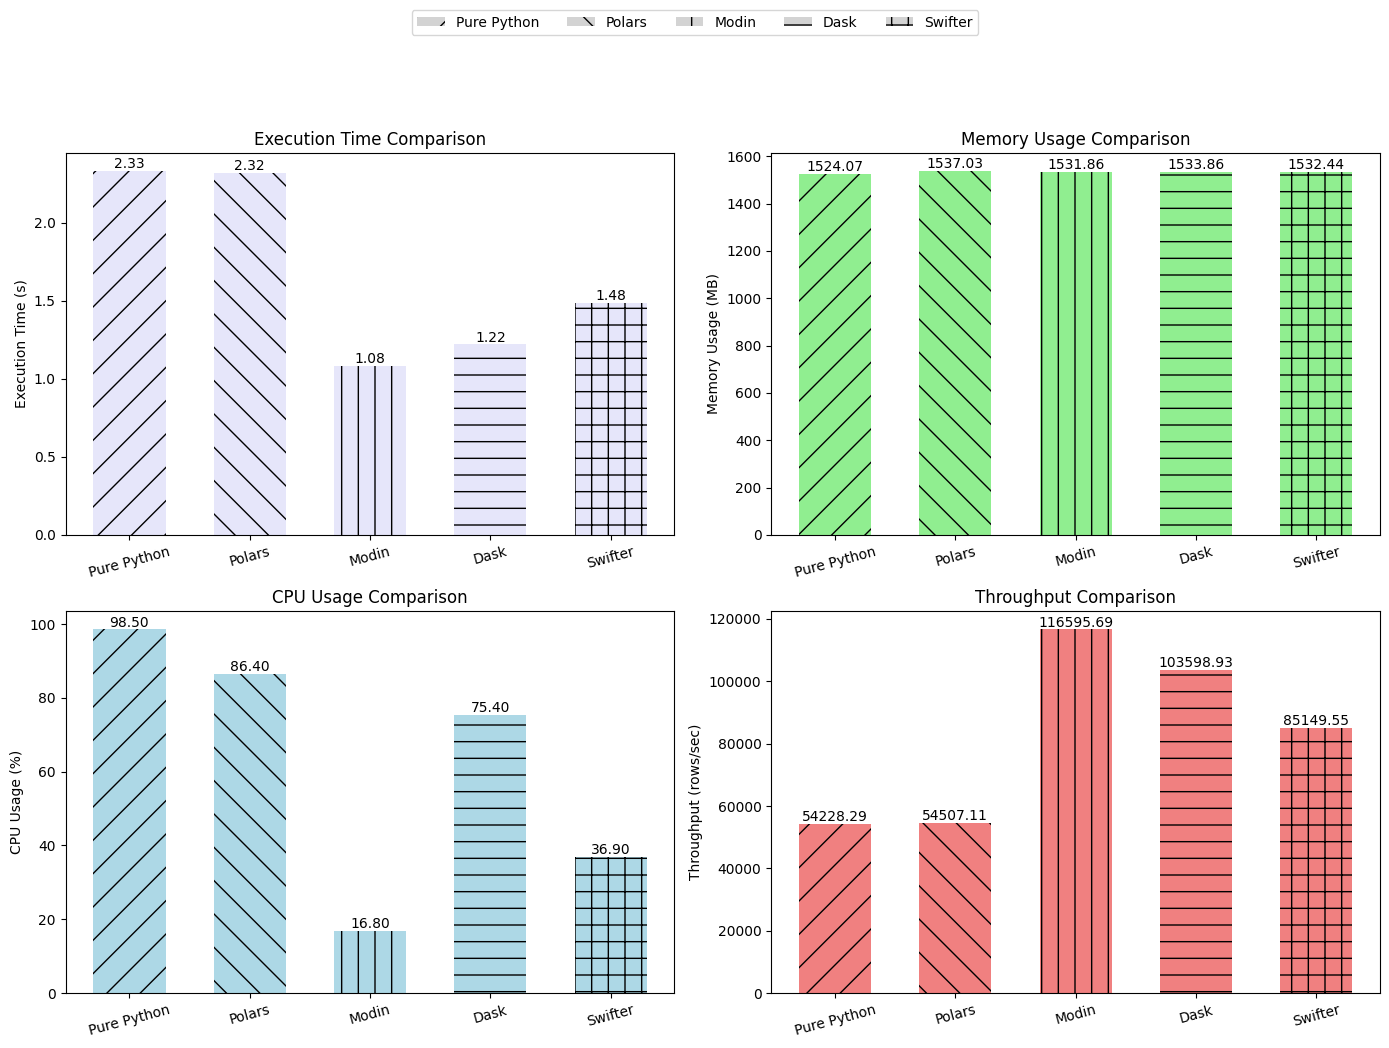

In [ ]:
# Extract performance metrics for plotting
execution_times = [stats[lib]["Execution Time (s)"] for lib in labels]
cpu_usages = [stats[lib]["CPU Usage (%)"] for lib in labels]
memory_usages = [stats[lib]["Memory Usage (MB)"] for lib in labels]
throughputs = [stats[lib]["Throughput (rows/sec)"] for lib in labels]

# Define unique hatch patterns for each library to differentiate them within a subplot
hatch_patterns = ['/', '\\', '|', '-', '+']

# Define distinct colors for each of the four subplots (metrics)
subplot_colors = [
    '#E6E6FA',  # Light Lavender for Execution Time
    '#90EE90',  # Light Green for Memory Usage
    '#ADD8E6',  # Light Blue for CPU Usage
    '#F08080'   # Light Coral for Throughput
]

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Function to plot bars with a specified color for the subplot and unique hatch patterns
def plot_bars(ax, data, title, ylabel, bar_color):
    """
    Plots a bar chart on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes object to draw the plot on.
        data (list): The list of data values for the bars.
        title (str): The title of the subplot.
        ylabel (str): The label for the y-axis.
        bar_color (str): The color to apply to all bars in this subplot.
    """
    # Create the bars, all with the same 'bar_color' for this subplot
    bars = ax.bar(x, data, width, color=bar_color)
    # Apply unique hatch patterns to each individual bar to differentiate libraries
    for bar, hatch in zip(bars, hatch_patterns):
        bar.set_hatch(hatch) # Set the hatch pattern for the current bar
    ax.set_title(title) # Set the title of the subplot
    ax.set_ylabel(ylabel) # Set the y-axis label
    ax.set_xticks(x) # Set x-axis ticks at the positions of the bars
    ax.set_xticklabels(labels, rotation=15) # Set x-axis tick labels (library names) with rotation
    ax.bar_label(bars, fmt='%.2f') # Add data labels on top of the bars, formatted to two decimal places

# Call the plot_bars function for each subplot, assigning a unique color
plot_bars(axs[0, 0], execution_times, 'Execution Time Comparison', 'Execution Time (s)', subplot_colors[0])
plot_bars(axs[0, 1], memory_usages, 'Memory Usage Comparison', 'Memory Usage (MB)', subplot_colors[1])
plot_bars(axs[1, 0], cpu_usages, 'CPU Usage Comparison', 'CPU Usage (%)', subplot_colors[2])
plot_bars(axs[1, 1], throughputs, 'Throughput Comparison', 'Throughput (rows/sec)', subplot_colors[3])

# Create a custom legend to explain the hatch patterns for each library
# The facecolor for the legend elements is set to 'lightgray' to be neutral,
# as the main bar color is now determined by the subplot.
legend_elements = [
    plt.Rectangle(
        (0, 0), 1, 1, # Rectangle dimensions for the legend swatch
        facecolor='lightgray', # Neutral background color for the legend swatch
        hatch=hatch_patterns[i], # Apply the specific hatch pattern
        label=labels[i] # Label for the legend entry (library name)
    ) for i in range(len(labels)) # Iterate through all libraries
]
# Add the legend to the figure
fig.legend(
    handles=legend_elements, # List of legend handles created above
    loc='upper center', # Position the legend at the upper center of the figure
    ncol=len(labels), # Arrange legend entries in a single row
    bbox_to_anchor=(0.5, 1.05) # Adjust legend position to be above the subplots
)

# Adjust subplot parameters for a tight layout and make space for the legend
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Ensure there's enough space at the top for the legend

# --- Google Colab Specific Operations ---
# This section handles mounting Google Drive and saving the plot.
# It will prompt for authentication if not already mounted.
try:
    drive.mount('/content/drive')
    # Save the generated figure as a PNG image to Google Drive
    plt.savefig('/content/drive/MyDrive/ColabNotebooks/HPDP_Project/Patterned_Graph.png', bbox_inches='tight')
except Exception as e:
    print(f"Could not mount Google Drive or save file: {e}")
    print("The plot will still be displayed in the output.")

# Display the plot
plt.show()


#### Execution Time Comparison

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Execution Time Comparison plot saved to Google Drive.


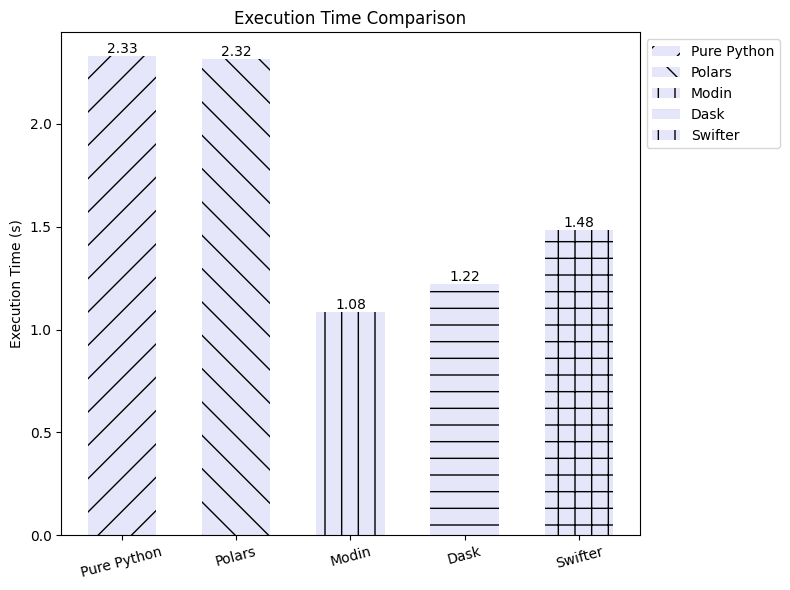

In [ ]:
# Extract performance metrics for plotting
execution_times = [stats[lib]["Execution Time (s)"] for lib in labels]

# Define unique hatch patterns for each library
hatch_patterns = ['/', '\\', '|', '-', '+']

# Define a color for the execution time subplot
execution_time_color = '#E6E6FA' # Light Lavender

# Create a separate figure for the execution time comparison
fig_exec_time, ax_exec_time = plt.subplots(figsize=(8, 6))

# Plot the execution time bars
bars_exec_time = ax_exec_time.bar(x, execution_times, width, color=execution_time_color)

# Apply hatch patterns to the bars
for bar, hatch in zip(bars_exec_time, hatch_patterns):
    bar.set_hatch(hatch)

# Set title, labels, and ticks
ax_exec_time.set_title('Execution Time Comparison')
ax_exec_time.set_ylabel('Execution Time (s)')
ax_exec_time.set_xticks(x)
ax_exec_time.set_xticklabels(labels, rotation=15)
ax_exec_time.bar_label(bars_exec_time, fmt='%.2f')

# Create a custom legend for this plot
legend_elements_exec_time = [
    plt.Rectangle(
        (0, 0), 1, 1,
        facecolor='#E6E6FA', # Neutral background color for the legend swatch
        hatch=hatch_patterns[i],
        label=labels[i]
    ) for i in range(len(labels))
]
ax_exec_time.legend(handles=legend_elements_exec_time, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# --- Google Colab Specific Operations ---
# Mount Google Drive and save the execution time plot
try:
    drive.mount('/content/drive')
    # Save the execution time figure as a PNG image to Google Drive
    plt.savefig('/content/drive/MyDrive/ColabNotebooks/HPDP_Project/Execution_Time_Comparison.png', bbox_inches='tight')
    print("Execution Time Comparison plot saved to Google Drive.")
except Exception as e:
    print(f"Could not mount Google Drive or save file: {e}")
    print("The execution time plot will still be displayed in the output.")

# Display the execution time plot
plt.show()

### Memory Usage Comparison

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memory Usage Comparison plot saved to Google Drive.


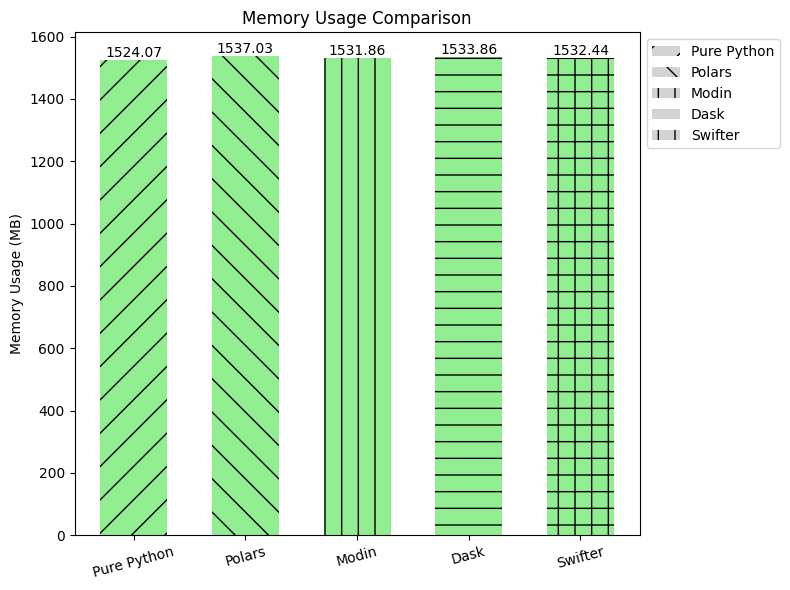

In [ ]:
# Extract performance metrics for plotting
memory_usages = [stats[lib]["Memory Usage (MB)"] for lib in labels]

# Define unique hatch patterns for each library
hatch_patterns = ['/', '\\', '|', '-', '+']

# Define a color for the memory usage subplot
memory_usage_color = '#90EE90' # Light Green

# Create a separate figure for the memory usage comparison
fig_memory_usage, ax_memory_usage = plt.subplots(figsize=(8, 6))

# Plot the memory usage bars
bars_memory_usage = ax_memory_usage.bar(x, memory_usages, width, color=memory_usage_color)

# Apply hatch patterns to the bars
for bar, hatch in zip(bars_memory_usage, hatch_patterns):
    bar.set_hatch(hatch)

# Set title, labels, and ticks
ax_memory_usage.set_title('Memory Usage Comparison')
ax_memory_usage.set_ylabel('Memory Usage (MB)')
ax_memory_usage.set_xticks(x)
ax_memory_usage.set_xticklabels(labels, rotation=15)
ax_memory_usage.bar_label(bars_memory_usage, fmt='%.2f')

# Create a custom legend for this plot
legend_elements_memory_usage = [
    plt.Rectangle(
        (0, 0), 1, 1,
        facecolor='lightgray', # Neutral background color for the legend swatch
        hatch=hatch_patterns[i],
        label=labels[i]
    ) for i in range(len(labels))
]
ax_memory_usage.legend(handles=legend_elements_memory_usage, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# --- Google Colab Specific Operations ---
# Mount Google Drive and save the memory usage plot
try:
    drive.mount('/content/drive')
    # Save the memory usage figure as a PNG image to Google Drive
    plt.savefig('/content/drive/MyDrive/ColabNotebooks/HPDP_Project/Memory_Usage_Comparison.png', bbox_inches='tight')
    print("Memory Usage Comparison plot saved to Google Drive.")
except Exception as e:
    print(f"Could not mount Google Drive or save file: {e}")
    print("The memory usage plot will still be displayed in the output.")

# Display the memory usage plot
plt.show()

### CPU Usage Comaprison

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU Usage Comparison plot saved to Google Drive.


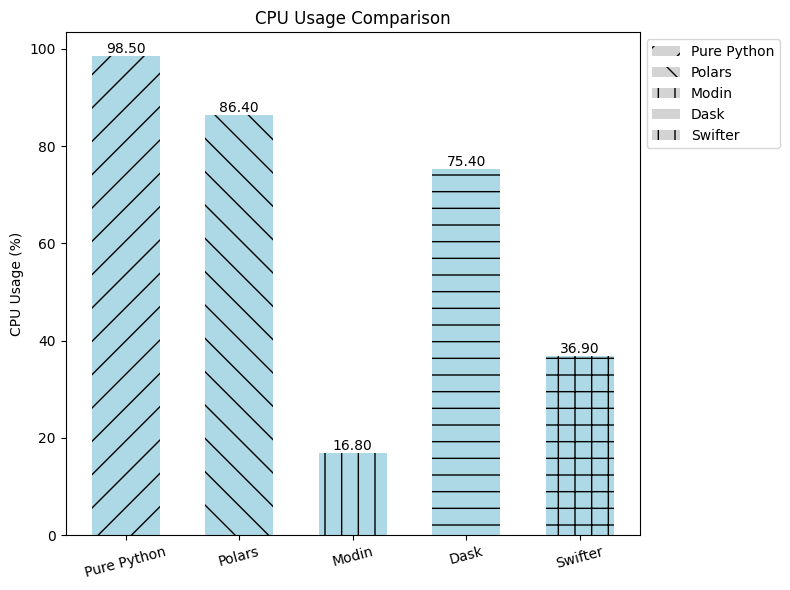

In [ ]:
# Extract performance metrics for plotting
cpu_usages = [stats[lib]["CPU Usage (%)"] for lib in labels]

# Define unique hatch patterns for each library
hatch_patterns = ['/', '\\', '|', '-', '+']

# Define a color for the CPU usage subplot
cpu_usage_color = '#ADD8E6' # Light Blue

# Create a separate figure for the CPU usage comparison
fig_cpu_usage, ax_cpu_usage = plt.subplots(figsize=(8, 6))

# Plot the CPU usage bars
bars_cpu_usage = ax_cpu_usage.bar(x, cpu_usages, width, color=cpu_usage_color)

# Apply hatch patterns to the bars
for bar, hatch in zip(bars_cpu_usage, hatch_patterns):
    bar.set_hatch(hatch)

# Set title, labels, and ticks
ax_cpu_usage.set_title('CPU Usage Comparison')
ax_cpu_usage.set_ylabel('CPU Usage (%)')
ax_cpu_usage.set_xticks(x)
ax_cpu_usage.set_xticklabels(labels, rotation=15)
ax_cpu_usage.bar_label(bars_cpu_usage, fmt='%.2f')

# Create a custom legend for this plot
legend_elements_cpu_usage = [
    plt.Rectangle(
        (0, 0), 1, 1,
        facecolor='lightgray', # Neutral background color for the legend swatch
        hatch=hatch_patterns[i],
        label=labels[i]
    ) for i in range(len(labels))
]
ax_cpu_usage.legend(handles=legend_elements_cpu_usage, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# --- Google Colab Specific Operations ---
# Mount Google Drive and save the CPU usage plot
try:
    drive.mount('/content/drive')
    # Save the CPU usage figure as a PNG image to Google Drive
    plt.savefig('/content/drive/MyDrive/ColabNotebooks/HPDP_Project/CPU_Usage_Comparison.png', bbox_inches='tight')
    print("CPU Usage Comparison plot saved to Google Drive.")
except Exception as e:
    print(f"Could not mount Google Drive or save file: {e}")
    print("The CPU usage plot will still be displayed in the output.")

# Display the CPU usage plot
plt.show()

### Throughput Comparison

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Throughput Comparison plot saved to Google Drive.


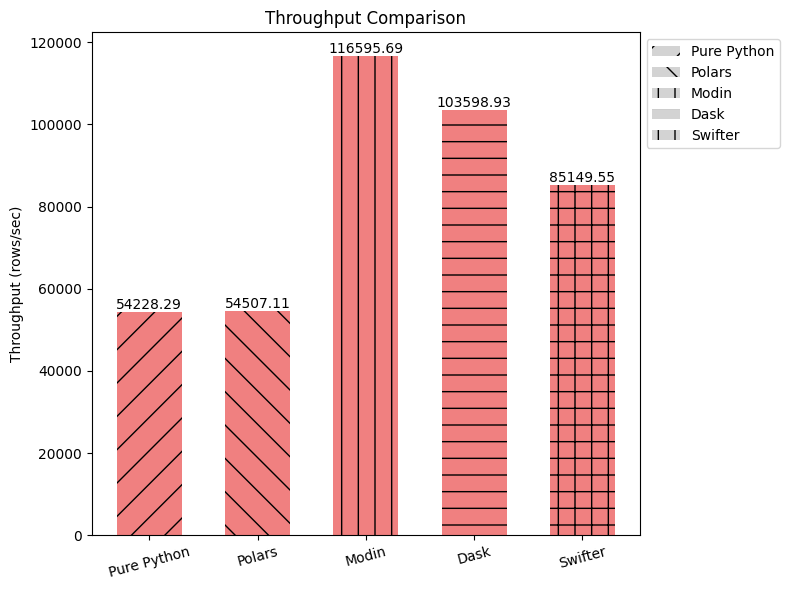

In [ ]:
# Extract performance metrics for plotting
throughputs = [stats[lib]["Throughput (rows/sec)"] for lib in labels]

# Define unique hatch patterns for each library
hatch_patterns = ['/', '\\', '|', '-', '+']

# Define a color for the throughput subplot
throughput_color = '#F08080'   # Light Coral

# Create a separate figure for the throughput comparison
fig_throughput, ax_throughput = plt.subplots(figsize=(8, 6))

# Plot the throughput bars
bars_throughput = ax_throughput.bar(x, throughputs, width, color=throughput_color)

# Apply hatch patterns to the bars
for bar, hatch in zip(bars_throughput, hatch_patterns):
    bar.set_hatch(hatch)

# Set title, labels, and ticks
ax_throughput.set_title('Throughput Comparison')
ax_throughput.set_ylabel('Throughput (rows/sec)')
ax_throughput.set_xticks(x)
ax_throughput.set_xticklabels(labels, rotation=15)
ax_throughput.bar_label(bars_throughput, fmt='%.2f')

# Create a custom legend for this plot
legend_elements_throughput = [
    plt.Rectangle(
        (0, 0), 1, 1,
        facecolor='lightgray', # Neutral background color for the legend swatch
        hatch=hatch_patterns[i],
        label=labels[i]
    ) for i in range(len(labels))
]
ax_throughput.legend(handles=legend_elements_throughput, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# --- Google Colab Specific Operations ---
# Mount Google Drive and save the throughput plot
try:
    drive.mount('/content/drive')
    # Save the throughput figure as a PNG image to Google Drive
    plt.savefig('/content/drive/MyDrive/ColabNotebooks/HPDP_Project/Throughput_Comparison.png', bbox_inches='tight')
    print("Throughput Comparison plot saved to Google Drive.")
except Exception as e:
    print(f"Could not mount Google Drive or save file: {e}")
    print("The throughput plot will still be displayed in the output.")

# Display the throughput plot
plt.show()